# Deep Neural Networks
* Multi-layered Networks
* INPUT LAYER -> HIDDEN LAYER1 -> HIDDEN LAYER2 -> ... -> OUTPUT LAYER  

e.g:
* INPUT LAYER (3 Nodes) > HIDDEN LAYER (6 Nodes) = 18 Adjustable Weights
* HIDDEN LAYER 1 (6 Nodes) > HIDDEN LAYER 2 (4 Nodes) = 24 Adjustable Weights
* HIDDEN LAYER 2 (4 Nodes) > OUTPUT LAYER (1 Node) = 4 Adjustable Weights

Giving a grand total of 46 adjustable weights to optimize on. The more intermediate layers that are added, the more nonlinear the model can be (often leads to improved model accuracy).

### Visualising Non Linear Data 

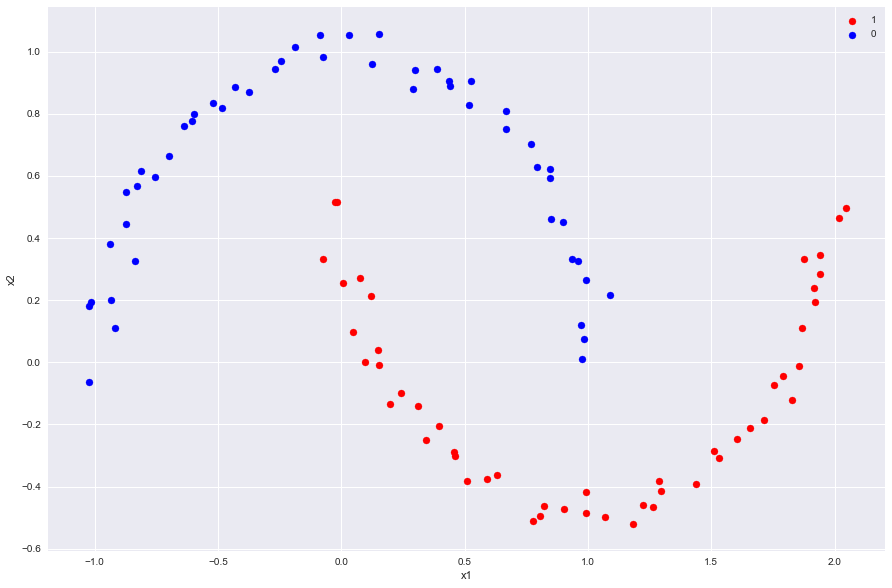

In [54]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_moons
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = make_moons(n_samples=100, random_state=3, noise=0.04)

features = pd.DataFrame(data[0])
labels = pd.Series(data[1])

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(features.loc[labels==1,0], features.loc[labels==1,1], c="red", label=1)
ax.scatter(features.loc[labels==0,0], features.loc[labels==0,1], c="blue", label=0)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend()


# Logistic Model vs Multi-Layered Perceptron

In [77]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
np.random.seed(8)

# Generate Data
data = make_moons(100, random_state=3, noise=0.04)
features = pd.DataFrame(data[0])
labels = pd.Series(data[1])
features["bias"] = 1

# Reshuffle Data
shuffled_index = np.random.permutation(features.index)
shuffled_data = features.loc[shuffled_index]
shuffled_labels = labels.loc[shuffled_index]

# Split 50-50 to Train and Test Sets
mid_length = int(len(shuffled_data)/2)
X_train = shuffled_data.iloc[0:mid_length]
X_test = shuffled_data.iloc[mid_length:len(shuffled_data)]
y_train = shuffled_labels.iloc[0:mid_length]
y_test = shuffled_labels.iloc[mid_length: len(labels)]

# Multi-Layered Perceptron (Sigmoid Activation Function) (1 Hidden Layer of 10 Nodes)
nn_sig_model = MLPClassifier(hidden_layer_sizes=(10,), activation="logistic", max_iter=500)
nn_sig_model.fit(X_train,y_train)
nn_sig_predictions = nn_sig_model.predict(X_test)
nn_sig_accuracy = accuracy_score(y_test,nn_sig_predictions)

# Multi-Layered Perceptron (ReLU Activation Function) (2 Hidden Layers of 5 Nodes Each)
nn_relu_model = MLPClassifier(hidden_layer_sizes=(15,15), activation="relu", max_iter=1000)
nn_relu_model.fit(X_train,y_train)
nn_relu_predictions = nn_relu_model.predict(X_test)
nn_relu_accuracy = accuracy_score(y_test,nn_relu_predictions)

# Standard Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train,y_train)
log_predictions = log_model.predict(X_test)
log_accuracy = accuracy_score(y_test,log_predictions)


print("MLP (Sigmoid) Accuracy:", nn_sig_accuracy)
print("MLP (ReLU) Accuracy:", nn_relu_accuracy)
print("Logistic Regression Accuracy:", log_accuracy)


C:\Program Files\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


MLP (Sigmoid) Accuracy: 0.84
MLP (ReLU) Accuracy: 1.0
Logistic Regression Accuracy: 0.88
